In [1]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('train.csv', sep=',')
df = df.dropna(subset=['Age'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
Diagnóstico y explicación el grado de varianza: bajo medio alto
Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

In [14]:
df.corr()

<ipython-input-14-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


### Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).


In [15]:
from sklearn.model_selection import train_test_split

# slpit df in train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size=0.1, random_state=77)

### Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto


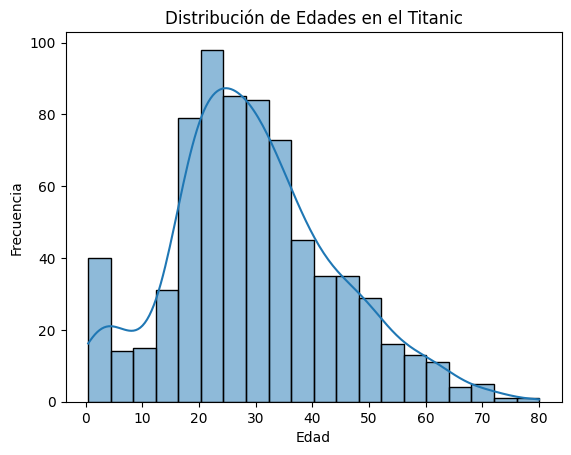

La variable 'edad' tiene una asimetría de 0.39, lo que indica una distribución sesgo positivo (asimétrica hacia la derecha).


In [16]:
### Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tienes un DataFrame llamado 'df' con tus datos del Titanic
# y una columna 'edad' que deseas evaluar en términos de simetría.

# Crear un histograma para visualizar la distribución de la variable 'edad'.
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribución de Edades en el Titanic')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Calcular la asimetría (skewness) de la variable 'edad'.
skewness = df['Age'].skew()

if skewness == 0:
    symm_type = "sin sesgo (simétrica)"
elif skewness > 0:
    symm_type = "sesgo positivo (asimétrica hacia la derecha)"
else:
    symm_type = "sesgo negativo (asimétrica hacia la izquierda)"

print(f"La variable 'edad' tiene una asimetría de {skewness:.2f}, lo que indica una distribución {symm_type}.")



Se puede obervar un ligero sesgo a la izquierda de parte de los datos, ademas de que vemos una gran cantidad de valores cercanos al 0, por lo que deberíamos revisar en caso de que exista algun error en los datos



### Diagnóstico y explicación el grado de varianza: bajo medio alto


In [12]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [23]:
import numpy as np

# Supongamos que tienes una lista de datos llamada 'datos'.
df1 = df[df['Age'] != 0]
datos = df1['Age']

# Calcular la varianza
varianza = np.var(datos)

# Calcular el rango (diferencia entre el valor máximo y el mínimo)
rango = max(datos) - min(datos)

# Interpretar el grado de varianza
if varianza < 10:
    grado_de_varianza = "Baja Varianza"
elif varianza < 100:
    grado_de_varianza = "Varianza Moderada"
else:
    grado_de_varianza = "Alta Varianza"

# Imprimir resultados
print(f"Varianza: {varianza:.2f}")
print(f"Rango: {rango}")
print(f"Grado de Varianza: {grado_de_varianza}")


Varianza: 210.72
Rango: 79.58
Grado de Varianza: Alta Varianza


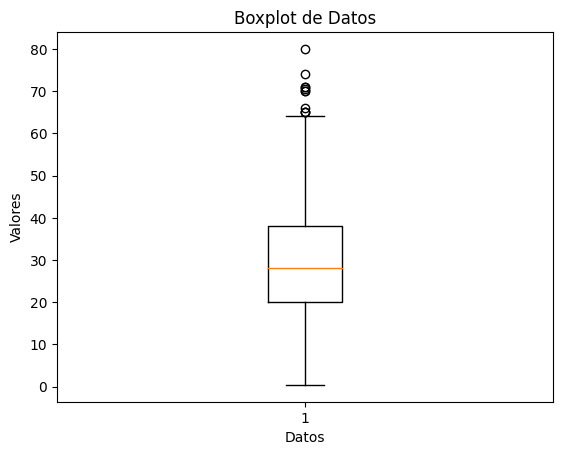

In [24]:
# Crear un boxplot
plt.boxplot(datos)

# Agregar etiquetas y título
plt.xlabel('Datos')
plt.ylabel('Valores')
plt.title('Boxplot de Datos')

# Mostrar el boxplot
plt.show()

In [21]:
df[df['Age'] != 0].value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

### Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Cargar el conjunto de datos del Titanic (puedes descargarlo desde Kaggle u otras fuentes)
data = pd.read_csv('train.csv')

# Explorar y preprocesar los datos
# Aquí debes realizar la limpieza y selección de características según tus necesidades.

# Ejemplo de preprocesamiento simple: eliminar columnas no deseadas y rellenar valores faltantes
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Inicializar y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Exactitud (Accuracy): {accuracy}')
print('Matriz de Confusión:')
print(confusion)
print('Reporte de Clasificación:')
print(classification_report_str)

# Visualizar los coeficientes de la regresión logística si es necesario
# Esto te permitirá ver cómo cada característica afecta a la probabilidad de sobrevivir
coeficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coeficients)


Exactitud (Accuracy): 0.8444444444444444
Matriz de Confusión:
[[46  8]
 [ 6 30]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90

      Feature  Coefficient
0      Pclass    -1.017752
1         Age    -0.033103
2       SibSp    -0.318840
3       Parch    -0.073303
4        Fare     0.001860
5    Sex_male    -2.585871
6  Embarked_Q    -0.085173
7  Embarked_S    -0.382889


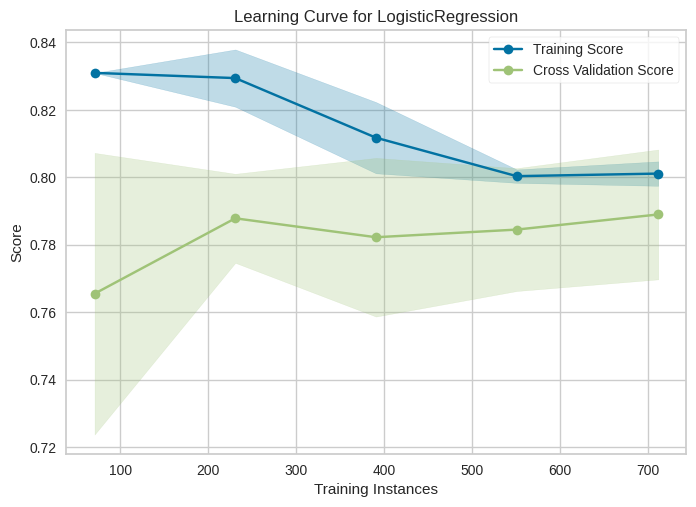

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

# Crear un objeto LearningCurve
cv = StratifiedKFold(n_splits=5)
lc_viz = LearningCurve(
    model, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ajustar el objeto LearningCurve a tus datos
lc_viz.fit(X, y)

# Visualizar la curva de aprendizaje
lc_viz.show()


Podemos ver que le learning curve se ve bien, parten separados el la grafica de entrenamiento d la de cross validation y conforme van aumentando las iteraciones estas 2 lineas van conevrgiendo pero no se cruzan, lo que nos indica un buena curva de aprendizaje sin over o underfitting

### Basándote en lo encontrado en tu análisis utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo y documenta en tu reporte cómo mejoró este.


Basado en los resultados anteriores lo que vamos a intentar es mejorar nuestro modelo mejorando los hiperparametros del mismo, para esto vamos a usar una libreria que se llama optuna la cual nos va a ayudar a lograr nuestro objetivo

In [25]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.0 MB/s eta 0:00:00


In [29]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define la función objetivo para la optimización de hiperparámetros
def objective(trial):
        # Cargar el conjunto de datos del Titanic (puedes descargarlo desde Kaggle u otras fuentes)
    data = pd.read_csv('train.csv')

    # Explorar y preprocesar los datos
    # Aquí debes realizar la limpieza y selección de características según tus necesidades.

    # Ejemplo de preprocesamiento simple: eliminar columnas no deseadas y rellenar valores faltantes
    data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
    data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
    # Carga tus datos y divide en conjuntos de entrenamiento y prueba
    # Reemplaza 'X' y 'y' con tus datos reales
    X = data.drop('Survived', axis=1)
    y = data['Survived']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

    # Define los hiperparámetros a optimizar
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    solver = trial.suggest_categorical('solver', ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'])

    # Crea y entrena el modelo de regresión logística con los hiperparámetros sugeridos
    model = LogisticRegression(C=C, solver=solver, random_state=42)
    model.fit(X_train, y_train)

    # Realiza predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcula la métrica de rendimiento (por ejemplo, precisión)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Crea un objeto de estudio Optuna
study = optuna.create_study(direction='maximize')

# Ejecuta la optimización de hiperparámetros
study.optimize(objective, n_trials=100)

# Obtiene los mejores hiperparámetros encontrados
best_params = study.best_params
best_accuracy = study.best_value

print("Mejores hiperparámetros:", best_params)
print("Mejor precisión encontrada:", best_accuracy)


[I 2023-09-05 20:22:06,920] A new study created in memory with name: no-name-6a425ea7-8480-4255-9596-fb5da3773ba5
<ipython-input-29-ecca656d94ed>:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
[I 2023-09-05 20:22:07,112] Trial 0 finished with value: 0.7666666666666667 and parameters: {'C': 0.005766883228637621, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.7666666666666667.
<ipython-input-29-ecca656d94ed>:26: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whi

Mejores hiperparámetros: {'C': 0.06717185602931577, 'solver': 'newton-cg'}
Mejor precisión encontrada: 0.8888888888888888


In [31]:
from sklearn.metrics import classification_report

data = pd.read_csv('train.csv')

# Explorar y preprocesar los datos
# Aquí debes realizar la limpieza y selección de características según tus necesidades.

# Ejemplo de preprocesamiento simple: eliminar columnas no deseadas y rellenar valores faltantes
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)
# Carga tus datos y divide en conjuntos de entrenamiento y prueba
# Reemplaza 'X' y 'y' con tus datos reales
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Obtén los mejores hiperparámetros encontrados durante la optimización
best_params = study.best_params

# Crea y entrena un nuevo modelo de regresión logística con los mejores hiperparámetros
best_model = LogisticRegression(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Genera el informe de clasificación
classification_rep = classification_report(y_test, y_pred)

# Imprime el informe de clasificación
print("Informe de Clasificación del Mejor Modelo:")
print(classification_rep)


Informe de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        54
           1       0.88      0.83      0.86        36

    accuracy                           0.89        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.89      0.89      0.89        90



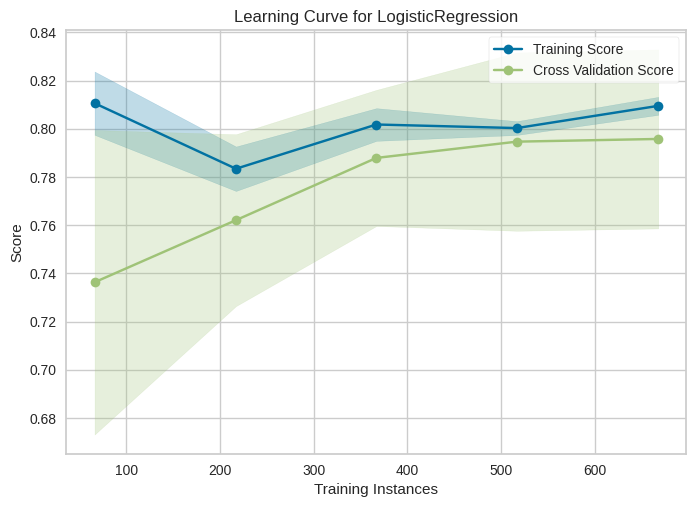

<Axes: title={'center': 'Learning Curve for LogisticRegression'}, xlabel='Training Instances', ylabel='Score'>

In [34]:
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold

# Crear un objeto LearningCurve
cv = StratifiedKFold(n_splits=4)
lc_viz = LearningCurve(
    best_model, cv=cv, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5)
)

# Ajustar el objeto LearningCurve a tus datos
lc_viz.fit(X, y)

# Visualizar la curva de aprendizaje
lc_viz.show()

Podemos ver que con respecto a la iteracion inicial logramos mejorar en aproximadamente 0.05 algo bastante bueno en cuanto a las predicciones y esto solamente haciendo la optimizacion de los hiperparametros, dejando de lado una de las cosas que creo que podrían ayudar bastante a este caso como elfeature engineering. Respecto a la curva de aprendizaje vemos que se ajusta mejor porque las curvas están más juntas entre ellas pero sin llegar al over o underfitting.